In [29]:
import shutil
import os
import tensorflow

In [46]:
os.mkdir('dataset')
os.mkdir('dataset/train')
os.mkdir('dataset/test')
os.mkdir('dataset/validation')
os.mkdir('dataset/train/healthy')
os.mkdir('dataset/train/tumor')
os.mkdir('dataset/test/healthy')
os.mkdir('dataset/test/tumor')
os.mkdir('dataset/validation/healthy')
os.mkdir('dataset/validation/tumor')

In [47]:
healthy=os.listdir('Brain Tumor Data Set/Healthey')
tumor=os.listdir('Brain Tumor Data Set/Brain Tumor')

In [48]:
print('tumor: ',len(tumor),'healthy: ',len(healthy))

tumor:  2513 healthy:  2087


In [51]:
#Writing a function to split dataset
def split(destination,origin,train,validation):
    li=os.listdir(origin)
    tot=len(li)
    train1=round(tot*train/100)
    validation=round(tot*(validation+train)/100)
    for i in li[0:train1]:
        shutil.copy(os.path.join(origin,i),os.path.join('dataset/train',destination))
    for i in li[train1:validation]:
        shutil.copy(os.path.join(origin,i),os.path.join('dataset/validation',destination))
    for i in li[validation:]:
        shutil.copy(os.path.join(origin,i),os.path.join('dataset/test',destination))

In [52]:
split('tumor','C:/Users/Sky/Downloads/Brain Tumor Data Set/Brain Tumor',70,15)

In [53]:
split('healthy','C:/Users/Sky/Downloads/Brain Tumor Data Set/Healthey',70,15)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import applications

In [87]:
model=Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224,224,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3) ,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adam())

In [88]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 26, 26, 64)      

In [89]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator=ImageDataGenerator(zoom_range=0.2,horizontal_flip=True,vertical_flip=True,rescale=1./255)
test_generator=ImageDataGenerator(rescale=1./225)

In [90]:
train=data_generator.flow_from_directory('dataset/train',target_size=(224,224),batch_size=50,class_mode='binary')
validation=data_generator.flow_from_directory('dataset/validation',target_size=(224,224),batch_size=50,class_mode='binary')
test=test_generator.flow_from_directory('dataset/test',target_size=(224,224),batch_size=50,class_mode='binary')

Found 3220 images belonging to 2 classes.
Found 690 images belonging to 2 classes.
Found 690 images belonging to 2 classes.


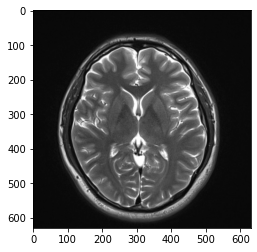

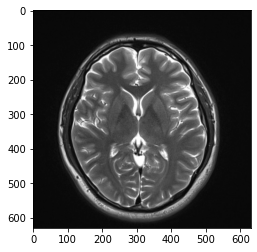

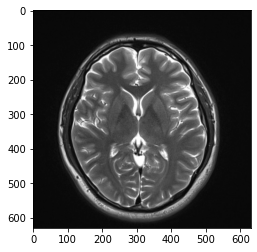

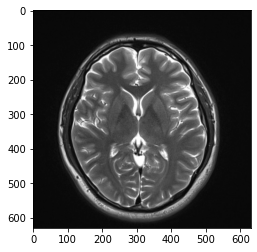

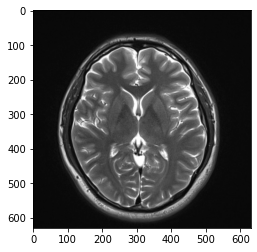

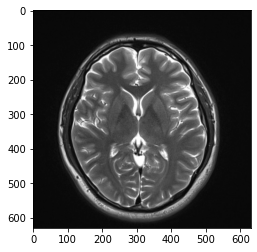

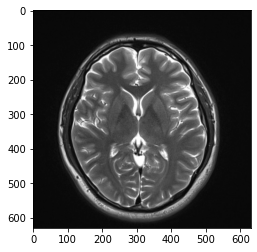

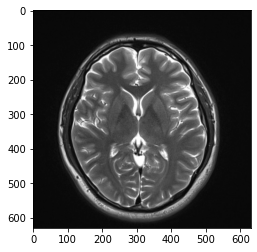

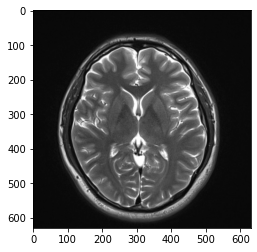

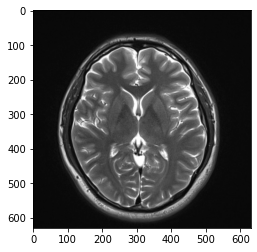

In [62]:
import matplotlib.pyplot as plt
lis=os.listdir('dataset/train/healthy')
num=list(np.linspace(1,10,10))
zipped=zip(num,lis)
for i,j in list(zipped):
    plt.imread('dataset/train/healthy/'+j)
    plt.imshow(img)
    plt.show()


In [91]:
model.fit(train,epochs=10,steps_per_epoch=round(3220/50),validation_data=validation,validation_steps=round(690/50))

Epoch 1/10
64/64 [==============================] - 393s 6s/step - loss: 0.6437 - accuracy: 0.6334 - val_loss: 0.9158 - val_accuracy: 0.3841
Epoch 2/10
64/64 [==============================] - 373s 6s/step - loss: 0.5219 - accuracy: 0.7309 - val_loss: 0.6644 - val_accuracy: 0.6609
Epoch 3/10
64/64 [==============================] - 374s 6s/step - loss: 0.4564 - accuracy: 0.7804 - val_loss: 0.6625 - val_accuracy: 0.7275
Epoch 4/10
64/64 [==============================] - 375s 6s/step - loss: 0.3995 - accuracy: 0.8136 - val_loss: 0.8295 - val_accuracy: 0.7406
Epoch 5/10
64/64 [==============================] - 374s 6s/step - loss: 0.3446 - accuracy: 0.8397 - val_loss: 0.7818 - val_accuracy: 0.8145
Epoch 6/10
64/64 [==============================] - 376s 6s/step - loss: 0.3418 - accuracy: 0.8448 - val_loss: 0.8791 - val_accuracy: 0.7841
Epoch 7/10
64/64 [==============================] - 374s 6s/step - loss: 0.2817 - accuracy: 0.8785 - val_loss: 0.8241 - val_accuracy: 0.8043
Epoch 8/10
64

In [65]:
train.class_indices

{'healthy': 0, 'tumor': 1}

In [ ]:
model.save('dataset/model.h5')

In [2]:
from tensorflow.keras.models import load_model

In [3]:
model=load_model('dataset/model.h5')

In [21]:
import gradio as gr
from PIL import Image
import numpy as np

def classify(image):# write afunction for gradio use
    image=Image.fromarray(image)
    image=image.resize((224,224))
    image=np.array(image)
    image=image.reshape(1,224,224,3)
    pred=model.predict(image)
    sol=pred[0]
    if round(sol[0])==1:
        return 'tumor'
    else:
        return 'healthy'

In [27]:
face=gr.Interface(fn=classify , inputs='image' ,outputs='text')

In [28]:
face.launch()

Running on local URL:  http://127.0.0.1:7868/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x2993c68abe0>, 'http://127.0.0.1:7868/', None)